In [51]:
# -*- coding: utf-8 -*-
"""
Created on Tue Apr 14 16:00:00 2020

@author: RamishK
"""

import numpy as np
from matplotlib import pylab as plt

# linespace generates an array from start and stop value, 100 elements
values = plt.linspace(-7,7,100)

# A. Sigmoid Activation function:

## 1. Introduction: 
- Non linear activation function
- For +ve higher input values, this function produces output 1.
- For -ve higher input values, this function produces output 0.
- For input=0, output is 0.5.
- For smaller -ve and +ve input values, it produces values as shown in graphical output.

## 2. Advantages:
- Smaller change in x --> Larger shift in y. Due to this property, sigmoid function is a good binary classifier.
- It produces output values between 0 and 1. Thus, it's value never vanishes! This means, for any input, it will produce a definite output. Because of this property, it is often used in output layers. 

## 3. Disadvantages:
- For extreme +ve and -ve input values, output of sigmoid function is almost saturated. In such cases output changes very negligibly. To understand this further, focus on the extreme ends (+ve and -ve sides) of graph of derivative of sigmoid function. In these regions, graph is almost flat as there is no/very little further change in output of sigmoid. This is called as vanishing gradients. If gradient vanishes, learning is very slow/negligible. Neural network gains almost 0 new information during training when learning is slow.
- When derivative of output is same for +ve as well as -ve values of input x, optimizer fails to get the direction in which the it should move in next iteration. This may result in convergence to wrong minima. 
- This problem may deactivate such neurons permanently-> That's a tragedy!

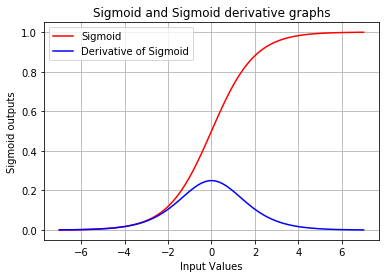

In [52]:
def sigmoid(x):
    s = 1/(1+np.exp(-x))
    return s

def sigmoid_derivative(x):
    s = sigmoid(x)
    ds = s*(1-s)
    return ds

# prepare the plot, associate the color red and blue and the label 
plt.plot(values, sigmoid(values), 'r', label='Sigmoid')
plt.plot(values, sigmoid_derivative(values), 'b', label='Derivative of Sigmoid')
# Draw the grid line in background.
plt.grid()
# Title & Subtitle
plt.title('Sigmoid and Sigmoid derivative graphs')
plt.xlabel('Input Values')
plt.ylabel('Sigmoid outputs')
plt.legend()
# create the graph
plt.show()

# B. TanH Activation function:

## 1. Introduction: 
- Non linear activation function
- For +ve higher input values, this function produces output 1.
- For -ve higher input values, this function produces output -1.
- For input=0, output is 0.
- For smaller -ve and +ve input values, it produces values as shown in graphical output.

## 2. Advantages:
- It has more steeper gradient than that of sigmoid function. Thus it offers wider range and fast learning.
- It produces output values between -1 and +1. 
- It's value never vanishes!
- It is superior over sigmoid function when used in hidden layers. For output layer, sigmoid is preferred

## 3. Disadvantages:
- Vanishing gradient problem!

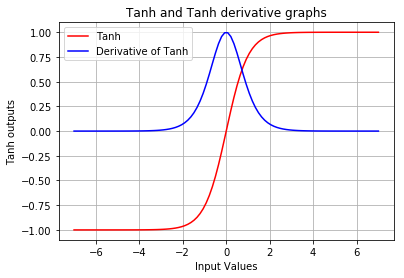

In [53]:
def tanh(x):
    t = (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
    return t

def tanh_derivative(x):
	t = tanh(x)
	dt = 1 - np.square(t)
	return dt

# prepare the plot, associate the color red and blue and the label 
plt.plot(values, tanh(values), 'r', label='Tanh')
plt.plot(values, tanh_derivative(values), 'b', label='Derivative of Tanh')
# Draw the grid line in background.
plt.grid()
# Title & Subtitle
plt.title('Tanh and Tanh derivative graphs')
plt.xlabel('Input Values')
plt.ylabel('Tanh outputs')
plt.legend()
# create the graph
plt.show()

# C. Rectified Linear Unit - ReLU Activation function:

## 1. Introduction: 
- Looks like a linear function. But it is a non linear activation function
- For +ve input x value, this function produces +ve x output.
- For -ve input x value, this function produces output 0.

## 2. Advantages:
- It offers wider range thus fast learning.
- It produces output values between 0 and +Infinity. 
- ReLU output is not saturated even for higher +ve values. Thus derivative/gradient never vanishes. Optimizer function never gets confused during optimization as it produces two distinct values of gradients (derivative = 0 for -ve input values and derivative = +1 for +ve input values). Thus it offers continuous learning
- It is superior over sigmoid and tanh functions.
- Neurons never die when ReLu is used
- Computationally less expensive

## 3. Disadvantages:
- Output is undefined at input x=0! No learning happens in this region.

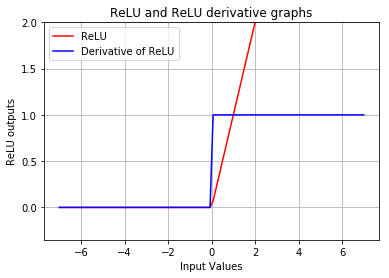

In [54]:
def ReLU(x):
    return np.maximum(0,x)

def ReLU_derivative(x):
    dr = []
    for item in x:
        if item < 0:
            dr.append(0)
        elif(item>0):
            dr.append(1)
        elif(item==0):
        # derivative is not defined in this case
            dr.append(0)
    return dr

# prepare the plot, associate the color red and blue and the label 
plt.plot(values, ReLU(values), 'r', label='ReLU')
plt.plot(values, ReLU_derivative(values), 'b', label='Derivative of ReLU')
# Draw the grid line in background.
plt.grid()
# Title & Subtitle
plt.ylim(top=2)
plt.title('ReLU and ReLU derivative graphs')
plt.xlabel('Input Values')
plt.ylabel('ReLU outputs')
plt.legend()
# create the graph
plt.show()

# D. Leaky Rectified Linear Unit - ReLU Activation function:

## 1. Introduction: 
- A modified ReLU, developed to counter the disadvantages of ReLU
- Looks like a linear function. But it is a non linear activation function
- For +ve x input value, this function produces +ve x output.
- For -ve x input value, this function produces output -0.01x.

## 2. Advantages:
- It offers wider range thus fast learning.
- It produces output values between -Infinity and +Infinity. 
- ReLU output is not saturated even for higher +ve and -ve values. Thus derivative/gradient never vanishes. Optimizer function never gets confused during optimization as it produces two distinct values of gradients (derivative = 0 for -ve input values and derivative = +1 for +ve input values). Thus it offers continuous learning
- It is superior over sigmoid, tanh and ReLU functions.
- Neurons never die when  leaky ReLu is used


## 3. Disadvantages:
- Computationally more expensive than ReLU

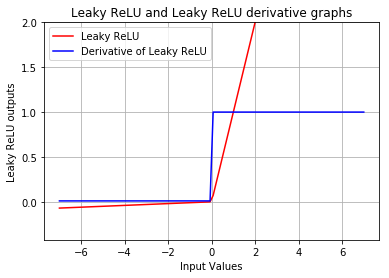

In [55]:
def leaky_ReLU(x):
    lr = np.maximum(0.01*x,x)
    return lr

def leaky_ReLU_derivative(x):
    dlr = []
    for item in x:
        if item < 0:
            dlr.append(0.01)
        elif(item>0):
            dlr.append(1)
        elif(item==0):
            # derivative is not defined in this case
            dlr.append(0)
    return dlr


# prepare the plot, associate the color red and blue and the label 
plt.plot(values,leaky_ReLU(values), 'r', label='Leaky ReLU')
plt.plot(values, leaky_ReLU_derivative(values), 'b', label='Derivative of Leaky ReLU')
# Draw the grid line in background.
plt.grid()
# Title & Subtitle

plt.ylim(top=2)
plt.title('Leaky ReLU and Leaky ReLU derivative graphs')
plt.xlabel('Input Values')
plt.ylabel('Leaky ReLU outputs')
plt.legend()
# create the graph
plt.show()

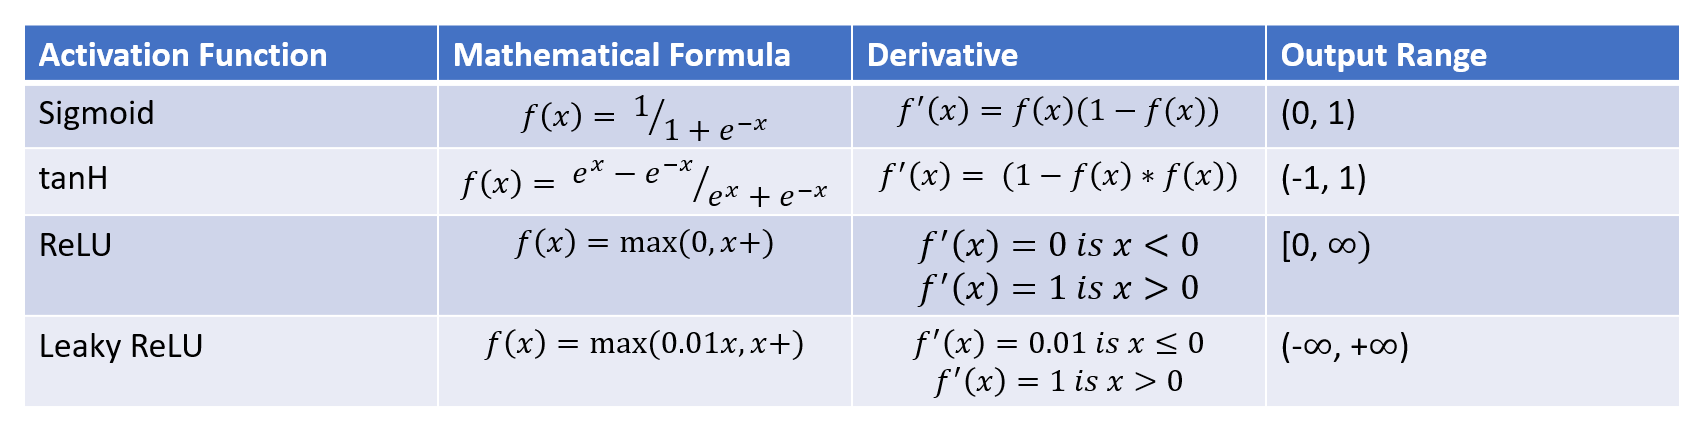